# Avacado Project

## Problem Statement

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military.

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

Some Relevant Columns of the dataset

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Importing Required Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [7]:
df=pd.read_csv('avocado.csv.zip')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Data Preprocessing

In [8]:
#droping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
print(df.shape)
print(df.columns)
type(df)

(18249, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


pandas.core.frame.DataFrame

There are 18249 rows and 13 columns in the Dataset.

we will be doing model regression with 'AveragePrice'as target column and 

model Classification 'Region' as target column.

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no null values in the dataset

Date, type, region are of object type and the rest are float type and year is intezer type

In [13]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [14]:
# Checking any null value presends in dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [15]:
# we have date column also in dataset and its datatype is objects, lets change into datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [16]:
# Creating columns for Day,and month in df(date)
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [17]:
#Now droping the Date column

df.drop('Date',axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [18]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Year ranges from 2015 to 2018

In [19]:
#checking unique values of XLarge bags
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [20]:
df[df['XLarge Bags'] == 16090.51]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
2694,1.02,30094698.85,13013750.35,10973972.6,834009.15,5272966.75,4583726.82,673149.42,16090.51,conventional,2015,TotalUS,8,3


So in all the rows we can say Total Bags = Small Bags + Large Bags + XLarge Bags.

So we are we are droping Small Bags,Large Bags and XLarge Bags.

Because Small, large and XLarge bags are the extension of the total bag.

In [21]:
df.drop(columns=["Small Bags","Large Bags",'XLarge Bags'],axis = 1, inplace = True)

In [22]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,29,11


In [23]:
df['4046'].value_counts()

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64

In [24]:
df['4225'].value_counts()

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64

In [25]:
df['4770'].value_counts()

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64

## Exploratory Data Analysis

### Checking the Categorical Data

In [26]:
#checking unique values of type
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

from the above data we can uderstand that both avacados are divided into organic and conventional type almost equally.

In [27]:
#checking unique values of region
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Avacados are qually divided among all the places where there is veryy minute deviation in WestTextNewMexico

In [28]:
df.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = True)

,Total Volume,AveragePrice
region,,
Syracuse,3.237476e+04,1.520325
Boise,4.264257e+04,1.348136
Spokane,4.605111e+04,1.445592
Albany,4.753787e+04,1.561036
Louisville,4.762427e+04,1.286686
Pittsburgh,5.564008e+04,1.364320
BuffaloRochester,6.793630e+04,1.516834
Roanoke,7.408879e+04,1.247929
Jacksonville,8.517753e+04,1.510947


West, California, southcentral, northeast and Southeast are the Top 5 region where it has consumed a lot

### Lets check the numerical data

In [29]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,2016.147899,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,0.939938,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2015.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2016.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,2017.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,2018.000000,31.000000,12.000000


In [30]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

## Data Visualisation

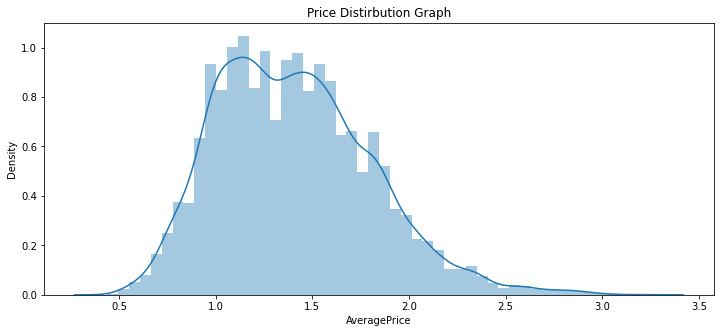

In [31]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["AveragePrice"])

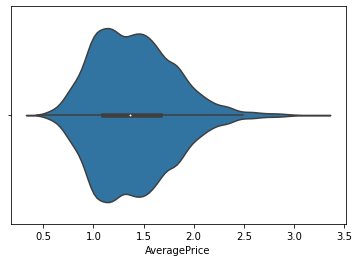

In [32]:
sns.violinplot(x='AveragePrice',data=df)
#show plot
plt.show()

The highest price of single avocado is 3.03 and lowest price is 0.44

Here we can see most of the avacadoes price lies between 1 to 1.5.

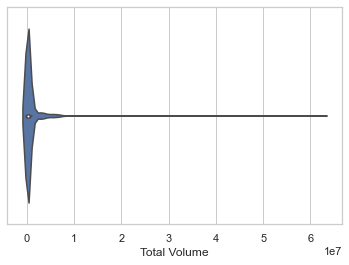

In [33]:
sns.set (style='whitegrid')
sns.violinplot(df['Total Volume'])
plt.show()

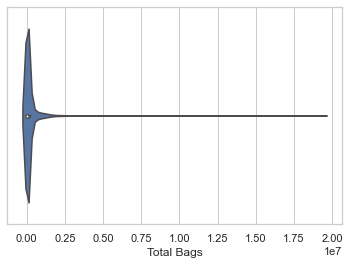

In [34]:
sns.set (style='whitegrid')
sns.violinplot(df['Total Bags'])
plt.show()

### Price Distribution Graph

Text(0.5, 1.0, 'Average Price by Month')

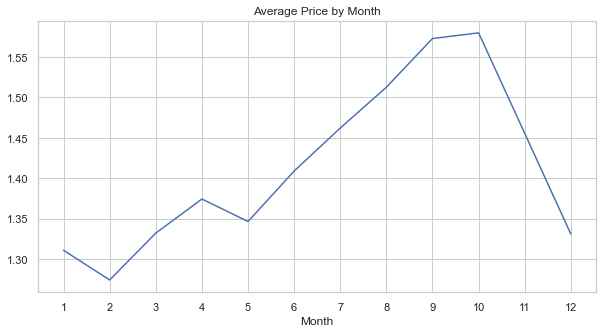

In [35]:
dategroup=df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=df.Month)
plt.title('Average Price by Month')

The price of the avacadoes are high during september and october and less during january and december

Text(0.5, 1.0, 'Average Price by Date')

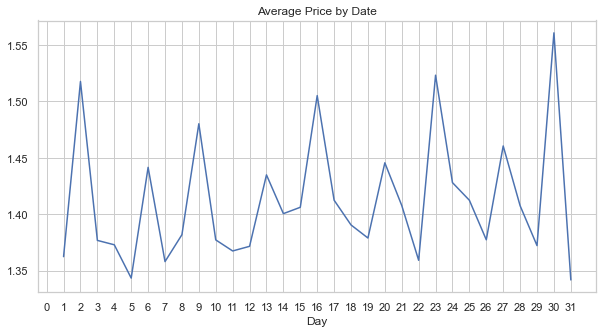

In [36]:
dategroup=df.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,32)) # Manually set x-ticks
dategroup['AveragePrice'].plot(x=df.Day)
plt.title('Average Price by Date')

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

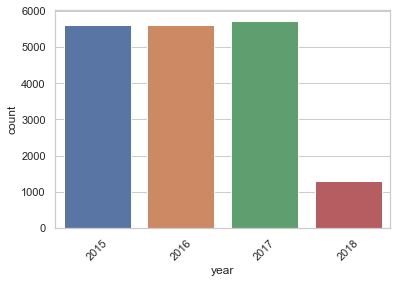

In [37]:
# Bar Chart to indicate the year
plt.figure(figsize=[6,4])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

Sale of avocado in 2017 was high and was least in year 2018. 

Now let,s compare AveragePrice with year.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

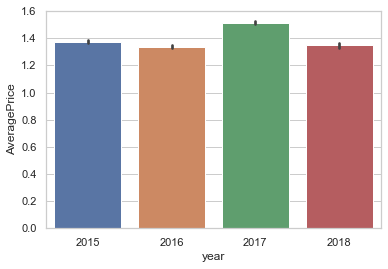

In [38]:
#checking max average price by year
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

### Average Peice in Each Region

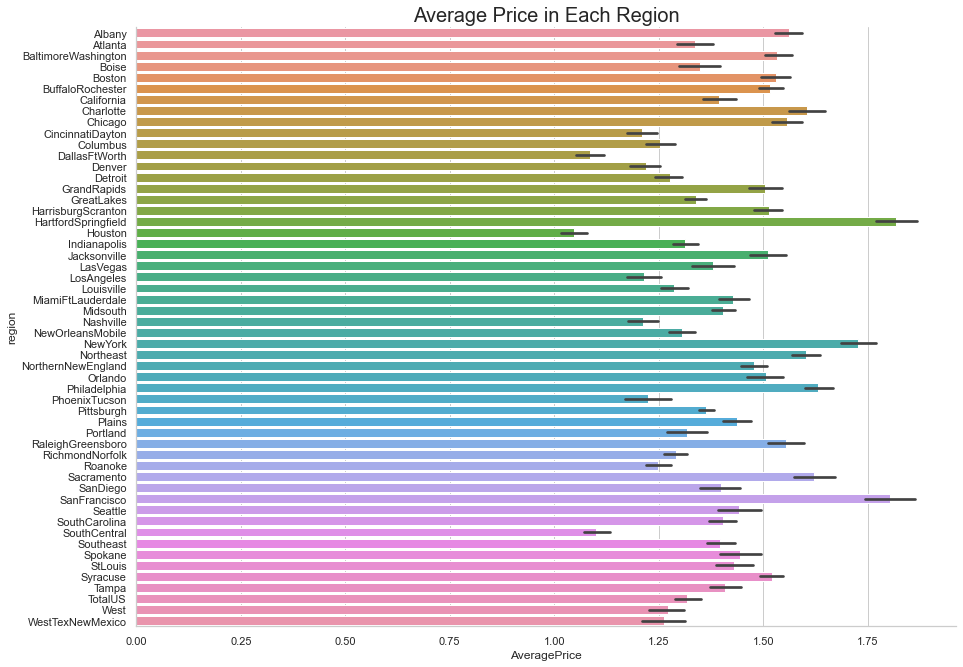

In [39]:
g=sns.catplot(x='AveragePrice',y='region',data=df,kind='bar')
g.fig.set_figwidth(20)
g.fig.set_figheight(10)
plt.title("Average Price in Each Region",{'fontsize':20})
plt.show()

HartfordSpringfield, SanFrancisco and NewYork are the regions with highest price ratio as compared to other regions.

#### Average price in each region yearly

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

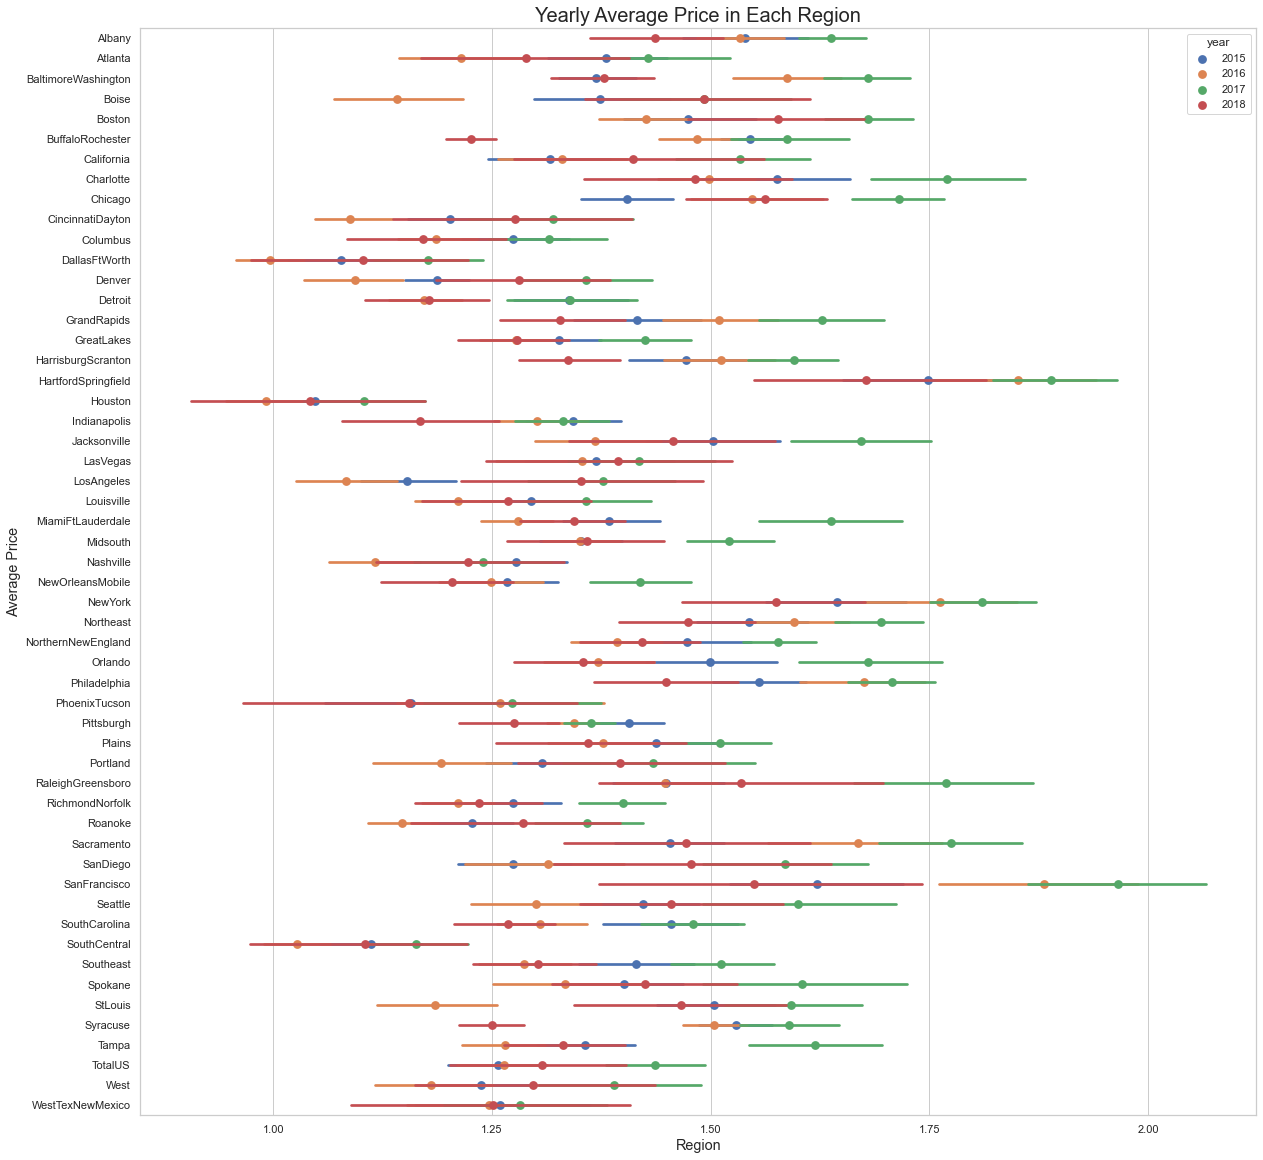

In [40]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

### Type column Average Price in Each Region

<AxesSubplot:xlabel='type', ylabel='count'>

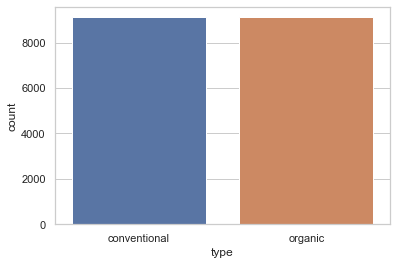

In [41]:
#countplot to indicate type of avocado
sns.countplot(df['type'])

there is a balanced data for conventional and organic types

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

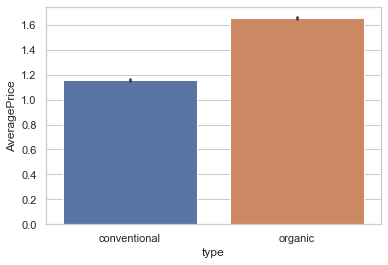

In [42]:
#plotting average price by type of avocado
sns.barplot(x = "type" , y = "AveragePrice" ,data=df )

As expected, organic avocadoes average price is much higher than the conventional avocado's average price.

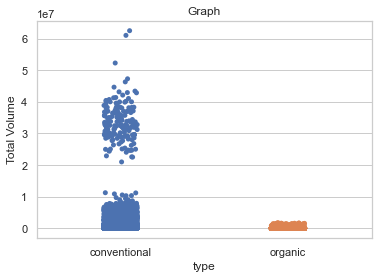

In [43]:
#Which type of Avocados are more in demand (Conventional or Organic)?
ax=sns.stripplot(x="type",y="Total Volume",data=df)
plt.title('Graph')
plt.show()

 In this chart, we can see price changes according to the type. 

In cities, organic avocado is more expensive as a standard

Text(0.5, 1.0, 'Type Average Price in Each Region')

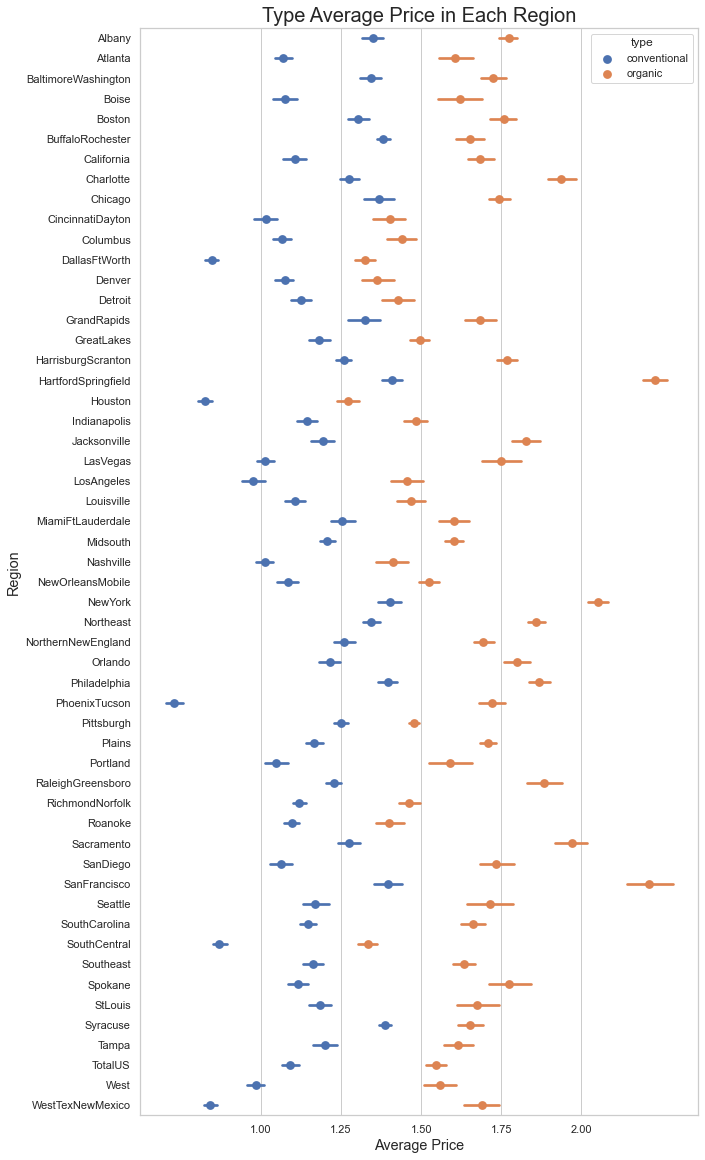

In [44]:
plt.figure(figsize=(10,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

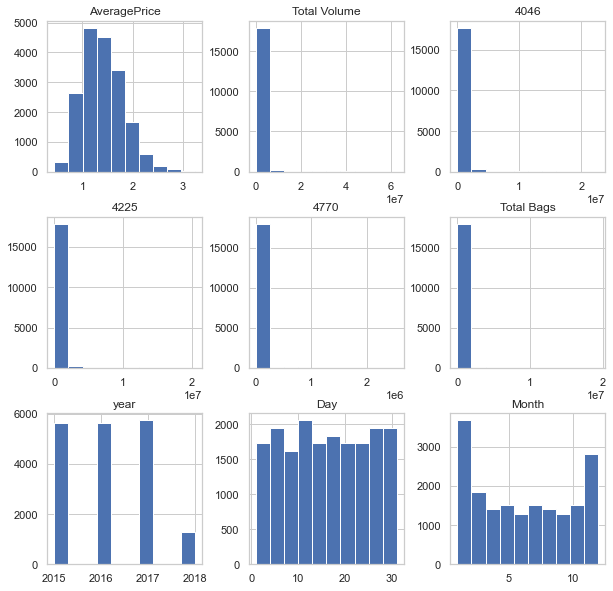

In [45]:
# checking the distribution of the numeric features
df.select_dtypes(exclude="object").hist(figsize= (10,10)); 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
 9   Day           18249 non-null  int64  
 10  Month         18249 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.5+ MB


In [47]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015,Albany,29,11


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   type          18249 non-null  object 
 7   year          18249 non-null  int64  
 8   region        18249 non-null  object 
 9   Day           18249 non-null  int64  
 10  Month         18249 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.5+ MB


In [49]:
# use label encoder to change data type in type and region columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['type','region']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,2015,0,29,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,2018,53,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,2018,53,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,2018,53,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,2018,53,14,1


## Let's Check the Correlation

In [50]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,0.615845,0.093197,-0.011716,0.027386,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,-0.232434,0.017193,0.174176,-0.009747,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,-0.225819,0.003353,0.192073,-0.010159,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,-0.232289,-0.009559,0.145726,-0.012393,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,-0.210027,-0.036531,0.095252,-0.009009,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,-0.217788,0.071552,0.175256,-0.004988,-0.022724
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,1.000000,-0.000032,-0.000280,-0.000013,-0.000085
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,-0.000032,1.000000,-0.000055,0.004475,-0.177050
region,-0.011716,0.174176,0.192073,0.145726,0.095252,0.175256,-0.000280,-0.000055,1.000000,-0.000021,-0.000144
Day,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.000013,0.004475,-0.000021,1.000000,0.010621


Here we can See that Total Volume, 4046,4225,4770 and Total Bags are negatively correlated with AveragePrice. 

Date , months and year is positively correlated with Average price.

so we can say Average price was highly dependent on time of the year.

Some multicollinearity is also seen between the columns.

<AxesSubplot:>

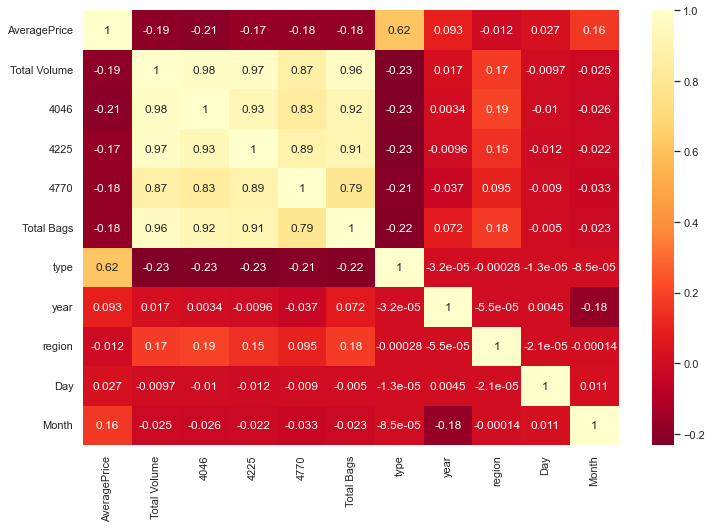

In [51]:
# Use heatmap to check correlation for better understanding.
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

Here Total Volumn,4046,4225,4770 and total bags have multicollinearity. Also 4046,4225 and 4770 arepart of total volumn only. So we will drop these three columns after checking VIF.


### Variance inflation factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']
x.head(2)

,Total Volume,4046,4225,4770,Total Bags,type,year,region,Day,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0,27,12
1,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0,20,12


In [53]:
x.shape[1]

10

In [54]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
    
vif_calc()

     VIF Factor      features
0  5.202468e+09  Total Volume
1  6.933733e+08          4046
2  6.320905e+08          4225
3  4.963758e+06          4770
4  4.236271e+08    Total Bags
5  2.122733e+00          type
6  1.122645e+01          year
7  4.109519e+00        region
8  4.187486e+00           Day
9  4.061359e+00         Month


Total Volume,4046,4225,4770 has high vif. so we are Droping column 4046,4225,4770

In [55]:
df.drop(['4046','4225','4770'],axis=1,inplace=True)
df.head(2)

,AveragePrice,Total Volume,Total Bags,type,year,region,Day,Month
0,1.33,64236.62,8696.87,0,2015,0,27,12
1,1.35,54876.98,9505.56,0,2015,0,20,12


In [56]:
x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']
x.head(2)

,Total Volume,Total Bags,type,year,region,Day,Month
0,64236.62,8696.87,0,2015,0,27,12
1,54876.98,9505.56,0,2015,0,20,12


In [57]:
x.shape[1]

7

In [58]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    vif['features']=x.columns
    print(vif)
vif_calc()

   VIF Factor      features
0   14.746413  Total Volume
1   14.622044    Total Bags
2    2.118724          type
3   11.135764          year
4    4.022724        region
5    4.187175           Day
6    4.057258         Month


let's Continue with this model

## let's Check the Skewness

In [59]:
x=df.drop('AveragePrice', axis=1)
y=df['AveragePrice']
x.head(2)

,Total Volume,Total Bags,type,year,region,Day,Month
0,64236.62,8696.87,0,2015,0,27,12
1,54876.98,9505.56,0,2015,0,20,12


In [60]:
df.skew().sort_values(ascending=False)

Total Bags      9.756072
Total Volume    9.007687
AveragePrice    0.580303
year            0.215339
Month           0.106617
Day             0.014310
type            0.000329
region          0.000030
dtype: float64

Since, only two columns i.e total bags and total volume are skewed towards right. 

So applying log transfer on both the columns

In [61]:
# Applying log transformation and removing skewness
df["Total Volume"] = np.log1p(df["Total Volume"])
df["Total Bags"] = np.log1p(df["Total Bags"])

In [62]:
df.skew().sort_values(ascending=False)

AveragePrice    0.580303
year            0.215339
Month           0.106617
Total Volume    0.088098
Day             0.014310
type            0.000329
region          0.000030
Total Bags     -0.218874
dtype: float64

## Let's Check Outliers

AveragePrice       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Total Volume    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Total Bags      AxesSubplot(0.529348,0.536818;0.168478x0.343182)
type            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
year                  AxesSubplot(0.125,0.125;0.168478x0.343182)
region             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Day                AxesSubplot(0.529348,0.125;0.168478x0.343182)
Month              AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

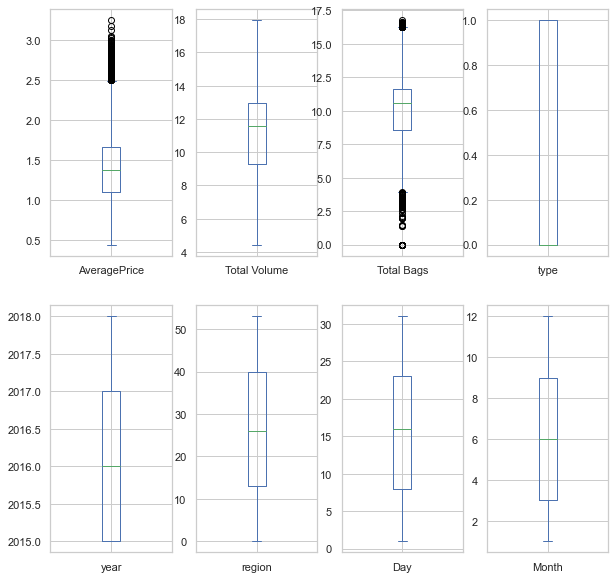

In [63]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

AveragePrice And Total Bags has more outliers.

## Removing Outliers

In [64]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,Total Bags,type,year,region,Day,Month
0,0.188689,0.107282,0.494074,0.999836,1.221282,1.700252,1.291857,1.647632
1,0.139020,0.175949,0.454761,0.999836,1.221282,1.700252,0.494231,1.647632
2,1.182069,0.158690,0.523041,0.999836,1.221282,1.700252,0.303396,1.647632
3,0.809551,0.017121,0.672335,0.999836,1.221282,1.700252,1.101022,1.647632
4,0.312861,0.207558,0.644845,0.999836,1.221282,1.700252,1.519750,1.364669
...,...,...,...,...,...,...,...,...
18244,0.556347,0.685006,0.299689,1.000164,1.970504,1.700811,1.328915,1.181997
18245,0.755023,0.775077,0.466102,1.000164,1.970504,1.700811,1.405803,1.464959
18246,1.152375,0.778901,0.459975,1.000164,1.970504,1.700811,0.608177,1.464959
18247,1.301382,0.707798,0.391424,1.000164,1.970504,1.700811,0.189449,1.464959


In [65]:
z.shape

(18249, 8)

In [66]:
threshold=3
print(np.where(z>3))

(array([ 9192,  9212,  9894, 10232, 10334, 11024, 11316, 11318, 11319,
       11320, 11320, 11321, 11321, 11322, 11323, 11324, 11324, 11325,
       11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
       11330, 11331, 11331, 11332, 11332, 11333, 11334, 11335, 11336,
       11337, 11338, 11339, 11340, 11341, 11342, 11347, 11348, 11349,
       11350, 11351, 11352, 11353, 11354, 11387, 11388, 11594, 11595,
       11596, 11597, 11598, 11611, 11614, 11662, 11663, 12132, 12821,
       12823, 13033, 13035, 13037, 13038, 13395, 13657, 13661, 14019,
       14020, 14073, 14074, 14119, 14120, 14121, 14122, 14123, 14124,
       14125, 14126, 14128, 14129, 14177, 14385, 14385, 14404, 14699,
       14701, 14702, 14807, 14911, 14912, 14913, 14914, 14915, 14916,
       14917, 14918, 14919, 15124, 15125, 15127, 15128, 15129, 15130,
       15510, 15511, 15667, 15668, 15671, 15673, 15674, 15814, 15871,
       16024, 16050, 16055, 16395, 16399, 16421, 16660, 16661, 16662,
       16663, 16664

In [67]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,Total Bags,type,year,region,Day,Month
0,1.33,11.070344,9.070833,0,2015,0,27,12
1,1.35,10.912867,9.159737,0,2015,0,20,12
2,0.93,11.680313,9.005325,0,2015,0,13,12
3,1.08,11.277116,8.667708,0,2015,0,6,12
4,1.28,10.840377,8.729874,0,2015,0,29,11
...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,9.510421,1,2018,53,4,2
18245,1.71,9.538855,9.134090,1,2018,53,28,1
18246,1.87,9.530085,9.147945,1,2018,53,21,1
18247,1.93,9.693150,9.302969,1,2018,53,14,1


In [68]:
print(df.shape)
print(df_new.shape)

(18249, 8)
(18077, 8)


In [69]:
# Percentage Data loss

loss_percent=(18249-18077)/18249*100
print(loss_percent)

0.9425173982136008


0.942% data is lost

## Model Training By Regression

In [71]:
x = df_new.drop(columns=['AveragePrice'])
y = df_new[["AveragePrice"]]
print(x.shape)
print(y.shape)

#Above we are using AveragePrice as output variable as it is our target value and that's the value we need to predict with our best algorithm!

(18077, 7)
(18077, 1)


In [72]:
#Standardize the value of x so which will convert the mean around 0 and SD will become 1 , and make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)
x

,Total Volume,Total Bags,type,year,region,Day,Month
0,11.070344,9.070833,0,2015,0,27,12
1,10.912867,9.159737,0,2015,0,20,12
2,11.680313,9.005325,0,2015,0,13,12
3,11.277116,8.667708,0,2015,0,6,12
4,10.840377,8.729874,0,2015,0,29,11
...,...,...,...,...,...,...,...
18244,9.745419,9.510421,1,2018,53,4,2
18245,9.538855,9.134090,1,2018,53,28,1
18246,9.530085,9.147945,1,2018,53,21,1
18247,9.693150,9.302969,1,2018,53,14,1


## Let's Find Best Random State

In [73]:
maxScore = 0
maxRS = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.5067863171130048 on Random State 161


## Creating and Training the Model

In [74]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=161,test_size=0.20)

In [75]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(14461, 7) 	 (3616, 7)


In [76]:
print(y_train.shape,'\t',y_test.shape)

(14461, 1) 	 (3616, 1)


In [77]:
# Importing models library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Importing error metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [78]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print(f"test_score {p.score(x_test,y_test)}")
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.4758237799959609
test_score 0.5113678787290703
Error:
Mean absolute error: 0.21757355596865735
Mean squared error: 0.07488582584531966
Root Mean squared error: 0.2736527468258261
r2_score: 0.5113678787290703
********************************************************************************************


Score of Lasso() is: 0.0
test_score -1.2087092584600612e-05
Error:
Mean absolute error: 0.31921678493818895
Mean squared error: 0.1532578963545211
Root Mean squared error: 0.39148166796737893
r2_score: -1.2087092584600612e-05
********************************************************************************************


Score of Ridge() is: 0.47582373472455897
test_score 0.511358852915837
Error:
Mean absolute error: 0.21757645614723295
Mean squared error: 0.0748872091057491
Root Mean squared error: 0.27365527421511376
r2_score: 0.511358852915837
********************************************************************************************


Score of SVR() is

DecisionTreeRegressor() has good r2 score. Also Root mean squared error is least in DecisionTreeRegressor(). So selecting that model

In [79]:
# Finding out best random state using GridsearchCV
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
parameters={'random_state':range(42,500)}
gc=GridSearchCV(dt,parameters)
gc.fit(x,y)
gc.best_params_

{'random_state': 43}

In [80]:
#Again checking out Decision Tree Regressor scores using 160 as Random State

dtc=DecisionTreeRegressor(criterion='mae',random_state=160)
dtc.fit(x_train,y_train)
print('Score:', dtc.score(x_train,y_train))
preddt=dtc.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print('r2_score:', r2_score(y_test,preddt))

Score: 1.0


Mean absolute error: 0.12672566371681415
Mean squared error: 0.03823799778761062
Root Mean squared error: 0.19554538549301187


r2_score: 0.7504959882434006


## Cross Validation

In [81]:
# Cross validate of DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [-0.72012347  0.23141611 -0.07733995 -0.31393162 -0.45231207]
Mean Score: 0.32442321422007525
Standard Deviation: 0.32442321422007525


## Using Ensemble Technique to boostup score

In [82]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=160)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print('r2_score:', r2_score(y_test,predrf))

score: 0.9832081794710226


Mean absolute error: 0.09199585176991149
Mean squared error: 0.016633571615044244
Root Mean squared error: 0.1289712045963914


r2_score: 0.8914654770669266


In [83]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,learning_rate=1.0,random_state=160)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('\n')
print('r2_score:', r2_score(y_test,predad))

score: 0.9994030119129151


Mean absolute error: 0.08784845132743362
Mean squared error: 0.016608573008849558
Root Mean squared error: 0.1288742526994805


r2_score: 0.8916285936759222


Since AdaBoostRegressor is giving better score than DecisionTreeregressor and RandomForestRegressor . So we'll check cv for AdaBoostRegressor.

In [84]:
# Cross validate of AdaboostRegressor
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5,scoring='r2',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.7min


Score: [-0.32962053  0.48071759  0.22851567  0.16925737 -0.15947496]
Mean Score: 0.07787902723969982
Standard Deviation: 0.2883446261600449


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


## Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
# Choosing Ada Boost Regressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [86]:
GSCV = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=fmod_param,n_jobs=-1, verbose=1, cv=5)

In [87]:
%%time
GSCV.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Wall time: 5min 15s


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]},
             verbose=1)

In [88]:
GSCV.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 200,
 'random_state': 111}

In [89]:
Final_Model = AdaBoostRegressor(learning_rate=0.1, loss="exponential", n_estimators=200, random_state=111)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

fmod_r2score=cross_val_score(Final_Model,x_train,y_train,cv=5)
fmod_r2=fmod_r2score.mean()
print('Cross Val score', fmod_r2*100)

R2 score for the Best Model is: 54.275776398902856
Cross Val score 50.457551589197756


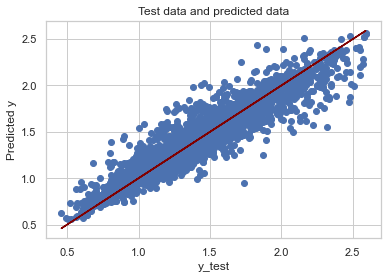

In [90]:
# Plotting scatter plot between test data and predicted data for AdaBoostRegressor
plt.scatter(y_test,predad)
plt.plot(y_test,y_test,color='maroon')
plt.xlabel('y_test')
plt.ylabel('Predicted y')
plt.title('Test data and predicted data')
plt.show()

## Model Saving

In [91]:
# Saving the AdaBoostRegressor
import pickle
filename='Avocado_AveragePrice.pkl'
pickle.dump(ad,open(filename,'wb'))

In [92]:
#Conslusion
import pickle
loaded_model=pickle.load(open('Avocado_AveragePrice.pkl','rb'))
result_v2=loaded_model.score(x_test,y_test)
print("Accuracy Score :",result_v2*100)

Accuracy Score : 89.16285936759222


In [93]:
Conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predad[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615
Predicted,0.76,1.09,1.4,1.94,1.4,1.1,1.76,1.34,1.35,1.25,...,1.21,1.15,1.08,1.43,1.6,2.32,1.47,1.09,2.06,2.38
Original,0.76,1.09,1.4,1.94,1.4,1.1,1.76,1.34,1.35,1.25,...,1.21,1.15,1.08,1.43,1.6,2.32,1.47,1.09,2.06,2.38


## Model Training by Classification

In [95]:
x1 = df_new.drop(columns=['region'])
y1 = df_new[["region"]]
print(x1.shape)
print(y1.shape)

#Above we are usingregion as output variable as it is our target value and that's the value we need to predict with our best algorithm!

(18077, 7)
(18077, 1)


In [96]:
y1=pd.DataFrame(df_new['region'])
y1

,region
0,0
1,0
2,0
3,0
4,0
...,...
18244,53
18245,53
18246,53
18247,53


In [97]:
sc = StandardScaler()
sc.fit_transform(x1)
x1 = pd.DataFrame(x1,columns=x1.columns)
x1

,AveragePrice,Total Volume,Total Bags,type,year,Day,Month
0,1.33,11.070344,9.070833,0,2015,27,12
1,1.35,10.912867,9.159737,0,2015,20,12
2,0.93,11.680313,9.005325,0,2015,13,12
3,1.08,11.277116,8.667708,0,2015,6,12
4,1.28,10.840377,8.729874,0,2015,29,11
...,...,...,...,...,...,...,...
18244,1.63,9.745419,9.510421,1,2018,4,2
18245,1.71,9.538855,9.134090,1,2018,28,1
18246,1.87,9.530085,9.147945,1,2018,21,1
18247,1.93,9.693150,9.302969,1,2018,14,1


# Finding The Best Random State

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [100]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x1_train,y1_train)
    predrf= LR.predict(x1_test)
    acc=accuracy_score(y1_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is',maxAcc,'on Random State',maxRS)

Best Accuracy score is 0.06664823008849557 on Random State 9


In [101]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=9,test_size=0.2)

In [102]:
# Checking train and test data size
print(x1_train.shape,'\t',x1_test.shape)

(14461, 7) 	 (3616, 7)


In [103]:
print(y1_train.shape,'\t',y1_test.shape)

(14461, 1) 	 (3616, 1)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
lg=LogisticRegression()
lg.fit(x1_train,y1_train)

LogisticRegression()

In [106]:
pred=lg.predict(x1_test)
print(pred)

[21  6 32 ... 52 40 52]


In [107]:
print('accuracy_score:' , accuracy_score(y1_test,pred))
print(confusion_matrix(y1_test,pred))
print(classification_report(y1_test,pred))

accuracy_score: 0.06664823008849557
[[ 6  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  3  0]
 [ 0  0  3 ...  0  1  0]
 ...
 [ 0  0  0 ... 31  9  0]
 [ 0  0  0 ... 24  4  0]
 [ 1  0  0 ...  0  6  0]]
              precision    recall  f1-score   support

           0       0.04      0.07      0.06        80
           1       0.00      0.00      0.00        65
           2       0.19      0.05      0.07        66
           3       0.06      0.22      0.10        68
           4       0.00      0.00      0.00        59
           5       0.11      0.07      0.09        80
           6       0.06      0.06      0.06        66
           7       0.00      0.00      0.00        55
           8       0.17      0.39      0.23        72
           9       0.06      0.03      0.04        64
          10       0.33      0.02      0.03        65
          11       0.00      0.00      0.00        63
          12       0.05      0.13      0.07        67
          13       0.00      0.00      0.00        

## Checking with different algorithms

In [108]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y1_test,predm))
    print(confusion_matrix(y1_test,predm))
    print(classification_report(y1_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.06664823008849557
[[ 6  0  0 ...  0  0  0]
 [ 3  0  0 ...  0  3  0]
 [ 0  0  3 ...  0  1  0]
 ...
 [ 0  0  0 ... 31  9  0]
 [ 0  0  0 ... 24  4  0]
 [ 1  0  0 ...  0  6  0]]
              precision    recall  f1-score   support

           0       0.04      0.07      0.06        80
           1       0.00      0.00      0.00        65
           2       0.19      0.05      0.07        66
           3       0.06      0.22      0.10        68
           4       0.00      0.00      0.00        59
           5       0.11      0.07      0.09        80
           6       0.06      0.06      0.06        66
           7       0.00      0.00      0.00        55
           8       0.17      0.39      0.23        72
           9       0.06      0.03      0.04        64
          10       0.33      0.02      0.03        65
          11       0.00      0.00      0.00        63
          12       0.05      0.13      0.07        67
          13       0.00 

Accuracy score of KNeighborsClassifier() is:
0.011891592920353982
[[ 8  0  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 ...
 [ 0  1 11 ... 30  0  0]
 [ 0  2  0 ...  0  1  0]
 [ 0 21 23 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.04      0.10      0.05        80
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        59
           5       0.00      0.00      0.00        80
           6       0.00      0.02      0.01        66
           7       0.00      0.00      0.00        55
           8       0.01      0.01      0.01        72
           9       0.00      0.00      0.00        64
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        63
          12       0.00      0.00      0.00        67
          13       0.

In [109]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'random_state':range(1,100)}
clf=GridSearchCV(dtc,parameters)
clf.fit(x1,y1)
clf.best_params_

{'criterion': 'gini', 'random_state': 94}

In [110]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=94)
dtc.fit(x1_train,y1_train)
print('score',dtc.score(x1_train,y1_train))
preddtc=dtc.predict(x1_test)
print('Accuracy score',accuracy_score(y1_test,preddtc))
print('confusion matrix',confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))

score 1.0
Accuracy score 0.47400442477876104
confusion matrix [[53  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  1]
 [ 0  1 35 ...  0  0  4]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  1 ...  0  0 31]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        80
           1       0.28      0.26      0.27        65
           2       0.64      0.53      0.58        66
           3       0.47      0.54      0.50        68
           4       0.49      0.56      0.52        59
           5       0.56      0.53      0.54        80
           6       0.75      0.68      0.71        66
           7       0.41      0.40      0.40        55
           8       0.71      0.72      0.72        72
           9       0.39      0.41      0.40        64
          10       0.28      0.25      0.26        65
          11       0.40      0.49      0.44        63
          12       0.47      0.48      0.47        67
          13       0.28  

## Using Ensemble Technique to boostup score

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=9,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x1_train,y1_train)
predrf=rf.predict(x1_test)
print(accuracy_score(y1_test,predrf))
print(confusion_matrix(y1_test,predrf))
print(classification_report(y1_test,predrf))

0.5251659292035398
[[65  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  3]
 [ 0  0 50 ...  0  0  1]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  0  1 ...  0  0 40]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        80
           1       0.38      0.31      0.34        65
           2       0.70      0.76      0.73        66
           3       0.62      0.57      0.60        68
           4       0.51      0.64      0.57        59
           5       0.55      0.54      0.54        80
           6       0.81      0.82      0.81        66
           7       0.38      0.53      0.44        55
           8       0.69      0.83      0.75        72
           9       0.34      0.38      0.36        64
          10       0.22      0.18      0.20        65
          11       0.45      0.62      0.52        63
          12       0.57      0.63      0.60        67
          13       0.36      0.25      0.30        68
          14  

In [112]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=9,base_estimator=dtc,algorithm='SAMME',learning_rate=0.01)
ad.fit(x1_train,y1_train)
ad_pred=ad.predict(x1_test)
print(accuracy_score(y1_test,ad_pred))
print(confusion_matrix(y1_test,ad_pred))
print(classification_report(y1_test,ad_pred))

0.46819690265486724
[[53  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  2]
 [ 0  1 38 ...  0  0  4]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  0  1 ...  0  0 28]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        80
           1       0.27      0.28      0.27        65
           2       0.66      0.58      0.61        66
           3       0.51      0.57      0.54        68
           4       0.49      0.56      0.52        59
           5       0.55      0.47      0.51        80
           6       0.82      0.71      0.76        66
           7       0.35      0.35      0.35        55
           8       0.70      0.74      0.72        72
           9       0.38      0.41      0.39        64
          10       0.25      0.22      0.23        65
          11       0.40      0.43      0.41        63
          12       0.48      0.49      0.49        67
          13       0.23      0.24      0.23        68
          14 

## Hyper parameter Tuning

In [113]:
RF = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(RF, para, scoring= "accuracy" )

grid.fit(x1_train,y1_train)
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x1_test) # predicting with best parameters

score 0.2845585686631392
best parameter {'min_samples_split': 8, 'min_samples_leaf': 10, 'max_samples': 0.3, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
best estimator RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_samples=0.3, min_samples_leaf=10,
                       min_samples_split=8)


## Cross Validation

In [114]:
best_parameter_RF = RandomForestClassifier(min_samples_split= 4, min_samples_leaf = 3, max_samples =0.4, max_features = 'auto', max_depth = 5, criterion = 'entropy')

for i in range(2,7):
    cv = cross_val_score(best_parameter_RF,x1,y1,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.026884704403903316 and the SD is 0.005198490639796211
at CV 3 The mean is  0.10184070962206648 and the SD is 0.040116451986739465
at CV 4 The mean is  0.11882328937602689 and the SD is 0.023716899685299848
at CV 5 The mean is  0.17242528978322869 and the SD is 0.07126124930162828
at CV 6 The mean is  0.18387652693426607 and the SD is 0.08012154319765145


Observation

Since Randomforest worked well out of all other model.
so we have done the hyperparameter tuning to set the best parameter for final model. 
Now we have checked the best Cross Validation as well that at level of CV is generated the best score and we have found CV 5 is at best

In [115]:
# Cross validate of RandomForestClassifier using cv=5
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x1,y1,cv=5,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.21653761 0.37693584 0.32697095 0.25753804 0.14661134]
Mean Score: 0.26491875665552816
Standard Deviation: 0.08098167340631038


## Model Saving

In [116]:
import pickle
filename='Predicted_Avocado_region.pkl'
pickle.dump(rf,open(filename,'wb'))

#                The End